<a href="https://colab.research.google.com/github/Arjun-krish-10/NLP/blob/main/BERT_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arjunkrish3008","key":"d2a4830d24df09a478ba1eaeebd7a242"}'}

In [ ]:
!pip install kaggle 

In [ ]:
! cd ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              223KB  2021-04-13 06:15:07           2661  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1563  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1117  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            278  
imsparsh/musicnet-dataset                                   MusicNet Dataset

In [ ]:
! kaggle competitions download -c 'sentiment-analysis-on-movie-reviews'

  0% 0.00/1.28M [00:00<?, ?B/s]
100% 1.28M/1.28M [00:00<00:00, 89.7MB/s]
  0% 0.00/494k [00:00<?, ?B/s]
100% 494k/494k [00:00<00:00, 116MB/s]
  0% 0.00/583k [00:00<?, ?B/s]
100% 583k/583k [00:00<00:00, 193MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('train.tsv.zip','r') as zipref:
  zipref.extractall('./')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [ ]:
df = pd.read_csv('train.tsv',sep='\t')

In [ ]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
pd.set_option('max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
df.drop_duplicates(subset=['SentenceId'],keep='first',inplace=True)
df.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
63,64,2,"This quiet , introspective and entertaining independent is worth seeking .",4
81,82,3,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",1
116,117,4,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",3
156,157,5,Aggressive self-glorification and a manipulative whitewash .,1
166,167,6,A comedy-drama of nearly epic proportions rooted in a sincere performance by the title character undergoing midlife crisis .,4
198,199,7,"Narratively , Trouble Every Day is a plodding mess .",1
213,214,8,"The Importance of Being Earnest , so thick with wit it plays like a reading from Bartlett 's Familiar Quotations",3
247,248,9,But it does n't leave you with much .,1
259,260,10,You could hate it for the same reason .,1


In [ ]:
df.reset_index(inplace=True)

In [ ]:
len(df)

8529

In [ ]:
df['Sentiment'] = np.where(df['Sentiment'] <= 2,0,1)

In [ ]:
df.head(10)

,index,PhraseId,SentenceId,Phrase,Sentiment
0,0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",0
1,63,64,2,"This quiet , introspective and entertaining independent is worth seeking .",1
2,81,82,3,"Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .",0
3,116,117,4,"A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder of a Shakespearean tragedy or a juicy soap opera .",1
4,156,157,5,Aggressive self-glorification and a manipulative whitewash .,0
5,166,167,6,A comedy-drama of nearly epic proportions rooted in a sincere performance by the title character undergoing midlife crisis .,1
6,198,199,7,"Narratively , Trouble Every Day is a plodding mess .",0
7,213,214,8,"The Importance of Being Earnest , so thick with wit it plays like a reading from Bartlett 's Familiar Quotations",1
8,247,248,9,But it does n't leave you with much .,0
9,259,260,10,You could hate it for the same reason .,0


In [ ]:
seqlen = df['Phrase'].apply(lambda x : len(x.split()))

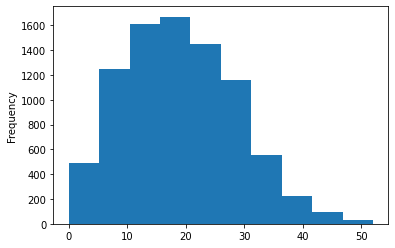

In [ ]:
seqlen.plot(kind='hist')

In [ ]:
seq_len = 50

In [ ]:
!pip install transformers

In [ ]:
# from transformers import AutoTokenizer

In [ ]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
# tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
tokenizer.tokenize('hi, how are you ?',add_special_tokens=True)

Keyword arguments {'add_special_tokens': True} not recognized.


['hi', ',', 'how', 'are', 'you', '?']

In [ ]:

tokenizer.encode_plus('hi, what is up', add_special_tokens=True, truncation=True,
                      max_length = seq_len,return_token_type_ids = False,return_attention_mask=True,
                      padding='max_length',return_tensors = 'tf')

{'input_ids': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[  101, 20844,   117,  1184,  1110,  1146,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int32)>}

In [ ]:
df['Sentiment'].unique()

array([0, 1])

In [ ]:
Xid = np.zeros((len(df),seq_len))
Xmask = np.zeros((len(df),seq_len)) 

In [ ]:
for i,sequence in enumerate(df['Phrase']):
  tokens = tokenizer.encode_plus(sequence, add_special_tokens=True, truncation=True,
                      max_length = seq_len,return_token_type_ids = False,return_attention_mask=True,
                      padding='max_length',return_tensors = 'tf')
  
  Xid[i,:],Xmask[i,:] = tokens['input_ids'],tokens['attention_mask']

In [ ]:
# final_df = pd.DataFrame((Xid[0],Xmask[0],labels))

In [ ]:
# final_df.T.head()

In [ ]:
# labels

In [ ]:
# target.toarray()

In [ ]:
labels = pd.get_dummies(df['Sentiment']).values

In [ ]:
with open('Xid.npy','wb') as f:
  np.save(f,Xid) 
with open('Xmask.npy','wb') as f:
  np.save(f,Xmask) 
with open('labels.npy','wb') as f:
  np.save(f,labels) 

In [ ]:
del df,Xid,Xmask,labels

In [ ]:
with open('Xid.npy','rb') as fp :
  Xid = np.load(fp)
with open('Xmask.npy','rb') as fp :
  Xmask = np.load(fp)
with open('labels.npy','rb') as fp :
  labels = np.load(fp)

In [ ]:
labels

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices((Xid,Xmask,labels))

In [ ]:
def train_test(ip_id,masks,label):
  return {'input_ids':ip_id,'attention_mask':masks}, label

In [ ]:
dataset = dataset1.map(train_test)

In [ ]:
for i in dataset.take(1):
  print(i)

({'input_ids': <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([  101.,   138.,  1326.,  1104., 13936., 25265., 16913., 15107.,
        1103.,  8050.,  2553.,  1115.,  1184.,  1110.,  1363.,  1111.,
        1103., 20398.,  1110.,  1145.,  1363.,  1111.,  1103.,   176.,
        9900.,   117.,  1199.,  1104.,  1134.,  5411.,  1821., 14225.,
        1133.,  3839.,  1104.,  1134.,  7919.,  1106.,  1277.,  1104.,
         170.,  1642.,   119.,   102.,     0.,     0.,     0.,     0.,
           0.,     0.])>, 'attention_mask': <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])>}, <tf.Tensor: shape=(2,), dtype=uint8, numpy=array([1, 0], dtype=uint8)>)


In [ ]:
dataset = dataset.shuffle(10000).batch(64)

In [ ]:
ds_len = len(list(dataset))
ds_len

134

In [ ]:
train = dataset.take(round(ds_len*0.9))
val = dataset.skip(round(ds_len*0.9))

In [ ]:
import tensorflow as tf

In [ ]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# from transformers import TFAutoModel

In [ ]:
# model = TFAutoModel.from_pretrained('bert-base-cased')

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-cased')

Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_projector', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_40']
You should probably TRAIN this model on a down-stream task to be able to use it fo

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential

In [ ]:
# mod = Sequential()

In [ ]:
input_ids = tf.keras.layers.Input(shape=((seq_len),),name='input_ids',dtype=np.int32)
input_masks = tf.keras.layers.Input(shape=((seq_len),),name='attention_mask',dtype=np.int32)

In [ ]:
embeddings = model.distilbert(input_ids,attention_mask=input_masks)[0]

In [ ]:
embeddings

<KerasTensor: shape=(None, 50, 768) dtype=float32 (created by layer 'distilbert')>

In [ ]:
x = tf.keras.layers.GlobalAveragePooling1D()(embeddings)

In [ ]:
x.shape

TensorShape([None, 768])

In [ ]:
x = tf.keras.layers.BatchNormalization()(x)

In [ ]:
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(32,activation='relu')(x)
y = tf.keras.layers.Dense(2,activation='softmax',name='output')(x)

mod = tf.keras.Model(inputs = [input_ids,input_masks],outputs = y,)

In [ ]:
# mod()

In [ ]:
# mod._layers.pop()

In [ ]:
mod.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
distilbert (TFDistilBertMainLay TFBaseModelOutput(la 65190912    input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_average_pooling1d_2 (Glo (None, 768)          0           distilbert[1][0]           

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [ ]:
mod.compile(optimizer=optimizer,metrics=[metrics],loss=loss)

In [ ]:
history = mod.fit(train,validation_data=val,epochs=1)

121/121 [==============================] - 19s 157ms/step - loss: 0.1683 - accuracy: 0.9336 - val_loss: 0.0886 - val_accuracy: 0.9669


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_save_name = 'BERT_movie_review_rating'

In [ ]:
mod.save(f'/content/gdrive/My Drive/Models/{model_save_name}')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Models/BERT_movie_review_rating/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Models/BERT_movie_review_rating/assets


In [ ]:
import tensorflow as tf


In [ ]:
new_model = tf.keras.models.load_model('/content/gdrive/My Drive/Models/BERT_movie_review_rating')

In [ ]:
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 50)]         0                                            
__________________________________________________________________________________________________
distilbert (TFDistilBertMainLay TFBaseModelOutput(la 65190912    input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_average_pooling1d_2 (Glo (None, 768)          0           distilbert[0][0]           

In [ ]:
new_model.weights

[<tf.Variable 'tf_distil_bert_for_sequence_classification_1/distilbert/embeddings/word_embeddings/weight:0' shape=(28996, 768) dtype=float32, numpy=
 array([[-2.5130160e-02, -3.3044446e-02, -2.4395937e-03, ...,
         -1.0848363e-02, -4.6824180e-02, -9.4855363e-03],
        [-4.8244460e-03, -2.1486228e-02, -8.7144701e-03, ...,
         -2.6029291e-02, -3.7861891e-02, -2.4102872e-02],
        [-1.6530612e-02, -1.7862258e-02,  1.0596388e-03, ...,
         -1.6370505e-02, -3.5670441e-02, -3.1419415e-02],
        ...,
        [-9.6465740e-03,  1.4814051e-02, -2.9182063e-02, ...,
         -3.7873339e-02, -4.6262864e-02, -1.6803110e-02],
        [-1.3170287e-02,  6.5377797e-05, -3.7222076e-02, ...,
         -4.3557994e-02, -1.1251587e-02, -2.2152457e-02],
        [ 1.1905452e-02, -2.3293305e-02, -2.2506082e-02, ...,
         -2.7135992e-02, -4.3555975e-02,  1.0528817e-04]], dtype=float32)>,
 <tf.Variable 'tf_distil_bert_for_sequence_classification_1/distilbert/embeddings/position_embedding

In [ ]:
st = 'The movie was action packed and filled with eye-opening moments. Adrenaline junkies will find it a wholesome experience.'

In [ ]:
token_test = tokenizer.encode_plus(st, add_special_tokens=True, truncation=True,
                      max_length = seq_len,return_token_type_ids = False,return_attention_mask=True,
                      padding='max_length',return_tensors = 'tf')

In [ ]:
token_test

{'input_ids': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[  101,  1109,  2523,  1108,  2168,  8733,  1105,  2709,  1114,
         2552,   118,  2280,  4899,   119, 24930, 23503,  2568, 22323,
         1905,  1209,  1525,  1122,   170,  2006, 11743,  2541,   119,
          102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int32)>}

In [ ]:
# xtest = tf.data.Dataset.from_tensor_slices((token_test['input_ids'],token_test['attention_mask']))

In [ ]:
out = new_model.predict([token_test['input_ids'],token_test['attention_mask']])
out

array([[0.22934079, 0.7706592 ]], dtype=float32)